# Series - úvod

- Objekt o jedné dimenzi (můžeme o něm přemýšlet jako o jednom sloupci v MS Excel)
- Položky Series mohou být jakéhokoliv datového typu (jednotlivé položky mohou být různého datového typu)
- Jednotlivé položky mají štítek (index), pomocí kterého lze na položky přistupovat


## Vytvoření Series

- Za pomoci metody Series(), kdy argumentem je jednodimenzionální objekt
- Výběrem jednoho sloupce (Series) z DataFrame

In [4]:
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df.loc[df['NAME']=='RUZYNE']
# Vyber jednoho sloupce z dataframe do promenne srazky, ktera ma typ pandas.core.series.Series
srazky = df['PRCP']

# Atribut dtype obsahuje informace o datovem typu hodnot Series, viz https://pandas.pydata.org/docs/reference/api/pandas.Series.dtype.html
print(srazky.dtype)

# Atribut shape obsahuje informace o poctu radku Series, viz https://pandas.pydata.org/docs/reference/api/pandas.Series.shape.html
print(srazky.shape)

# Nastaveni sloupce ['DATE'] coby indexu (štítku)
srazky = srazky.set_axis(df['DATE'])

# Metoda describe() vraci zakladni statisticke informace, viz https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html 
print(srazky.describe())



float64
(7601,)
count    7272.000000
mean        1.578287
std         5.049321
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       140.000000
Name: PRCP, dtype: float64


In [5]:
# Zakladni agregacni funkce
maximum = srazky.max()
minimum = srazky.min()
mean = srazky.mean()
median = srazky.median()
# navratovou hodnotou je Series z duvodu, ze data mohou mit vice modusu
modus = srazky.mode() 
pocet = srazky.count()

print(f'\nmaximalni srazky: {maximum},\nminimalni srazky: {minimum},\n\
prumerne srazky {mean},\nmedianove_srazky {median},\nmodus srazek {modus},\npocet hodnot {pocet}')


maximalni srazky: 140.0,
minimalni srazky: 0.0,
prumerne srazky 1.5782865786578657,
medianove_srazky 0.0,
modus srazek 0    0.0
Name: PRCP, dtype: float64,
pocet hodnot 7272


## Index Series

- Objekt sloužící jako popisek osy
- Nemusí mít unikátní hodnoty, některé metody to však vyžadují
- Jednotlivé indexu jsou neměnné, nemohou být změněny uživatelem
- Nastavení vlastního indexu po definici Series slouží metoda set_axis(), viz https://pandas.pydata.org/docs/reference/api/pandas.Series.set_axis.html
- Index lze změnit za pomoci metody reindex(), viz https://pandas.pydata.org/docs/reference/api/pandas.Series.reindex.html


## Datové typy

- Datový typ může být nastaven explicitně při definovaní Series či odhadnut z dat
- Výchozí datový typ pro Series textových hodnot či hodnot s různým datovým typem je 'Object'
- Chybějící hodnoty jsou datového typu 'float', tj. Series celých čísel (integer) a chybějící hodnoty má datový typ 'float'
- Informace o datovém typu je dostupná v atributu dtype
- Přehled datových typů v pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
- Změna datového typu probíhá za pomoci metody astype(), viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
- Změna datového typu na datum pomocí metody to_datetime(), viz https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

- Pokud je datovým typem sloupce datum, lze přistupovat na další atributy datumu (rok, měsíc, den apod.) prostřednictvím atributu dt, viz https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html


## Přistupování na data Series

### Metody head() a tail()

- Slouží pro omezení počtu položek vypisovaných do konzole, tj. nejedná se o fyzický filtr
- Počet vypisovaných řádků lze změnit (výchozí nastavení je 5) přidáním argumentu metody
    - definice metody head() https://pandas.pydata.org/docs/reference/api/pandas.Series.head.html
    - definice metody tail() https://pandas.pydata.org/docs/reference/api/pandas.Series.head.html


In [6]:
# Metoda head() vrati prvnich 5 hodnot
print(srazky.head())

# Metoda tail() vrati poslednich 5 hodnot
print(srazky.tail())

DATE
2000-01-01    NaN
2000-01-02    NaN
2000-01-03    0.0
2000-01-04    NaN
2000-01-05    NaN
Name: PRCP, dtype: float64
DATE
2020-11-14    0.0
2020-11-15    0.0
2020-11-16    1.0
2020-11-17    0.0
2020-11-18    0.0
Name: PRCP, dtype: float64


### Výběr hodnot na základě pozice, štítku či rozsahu hodnot

- Na konkrétní položky Series přistupujeme za pomoci metod:
    - loc, viz https://pandas.pydata.org/docs/reference/api/pandas.Series.loc.html
    - iloc, viz https://pandas.pydata.org/docs/reference/api/pandas.Series.iloc.html
    - at (preferovaná při přístupu na jedinou pozici), viz https://pandas.pydata.org/docs/reference/api/pandas.Series.at.html
- Přistupovat lze na konkrétní položky či rozsahy položek, přičemž na rozsah položek přistupujeme skrz tzv. slice, viz https://pandas.pydata.org/docs/user_guide/indexing.html#slicing-ranges


In [8]:
# # Atribut iloc slouží k přístupu na data na konkrétní pozici či intervalu pozic
# print(srazky.iloc[10])
# print(srazky.iloc[5:10])

# # Atribut loc slouží k přístupu na dat na konkrétním štítku či intervalu štítků
# print(srazky.loc['2000-01-01'])
# print(srazky.loc['2000-01-01':'2000-01-05'])


# # Atribut at slouží k přístupu na konkretni hodnotu. Pri tomto pouziti (pristup na jedinou hodnotu ) je rychlejsi nez operatory loc a iloc
# print(srazky.at['2000-01-01'])


0.0
DATE
2000-01-06    NaN
2000-01-07    NaN
2000-01-08    0.0
2000-01-09    NaN
2000-01-10    1.0
Name: PRCP, dtype: float64
nan
DATE
2000-01-01    NaN
2000-01-02    NaN
2000-01-03    0.0
2000-01-04    NaN
2000-01-05    NaN
Name: PRCP, dtype: float64
nan


#### Explicitní je lepší než implicitní

- Indexování bez uvedení operátorů loc či iloc má různé chování v případě, kdy je na indexu číslo a text, viz níže.
- Proto je žádoucí používat operátory loc, iloc či at

In [9]:
s = pd.Series(np.arange(3),index=[100,101,102])
s2 = pd.Series(np.arange(3),index=['a','b','c']) 

# Vrati hodnotu na pozici 1, tj. chová se jako .loc
print(s[100])


# Vrati hodnotu na pozici 1, tj. chová se jako .iloc
print(s2[1])

# Vrati hodnotu na pozici 100, ta ale neexistuje, tj. vrati chybu
try:
    print(s.iloc[100])
except:
    print('Hodnota mimo index')


0
1
Hodnota mimo index


C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_11744\4208378926.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s2[1])


## Filtrování Series


- Pro filtrování Series lze použít následující operátory: https://docs.python.org/3/reference/expressions.html#value-comparisons
- Pořadí operátorů při řetězí podmínek je následující: https://docs.python.org/3/reference/expressions.html#operator-precedence
- Na rozdíl od klasického Python, jako logická podmínka "a" neslouží "and" ale "&" stejně tak, pro "nebo" neslouží "or" ale "|" 
- K filtrování textových hodnot či hodnot s přibližnou shodou (parametr like) lze použít funkci metodu filter(), viz https://pandas.pydata.org/docs/reference/api/pandas.Series.filter.html

- Data lze filtrovat i za pomoci booleanovského vektoru, viz https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing






### Booleanovský vektor
- Umožňuje filtrovat položky splňující podmínku, tj. návratovou hodnotou podmínky je True
- NA hodnoty mají u podmínky návratovou hodnotu False

In [17]:


# V promenne prselo je Series s booleanovskymi hodnotami, kdy pro True plati, ze srazky jsou vetsi 0
prselo  = srazky>0
# # V promenne prselo_malo je Series s booleanovskymi hodnotami, kdy True plati pro polozky s hodnotami vetsi 0 a mensi 10 
prselo_malo = (srazky > 0)  & (srazky < 10)

print("srazky\n",srazky.head(10),"\n")
print("prselo\n",prselo.head(10),"\n")
print("prselo_malo\n",prselo_malo.head(10),"\n")



prselo_malo

srazky
 DATE
2000-01-01    NaN
2000-01-02    NaN
2000-01-03    0.0
2000-01-04    NaN
2000-01-05    NaN
2000-01-06    NaN
2000-01-07    NaN
2000-01-08    0.0
2000-01-09    NaN
2000-01-10    1.0
Name: PRCP, dtype: float64 

prselo
 DATE
2000-01-01    False
2000-01-02    False
2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
2000-01-08    False
2000-01-09    False
2000-01-10     True
Name: PRCP, dtype: bool 

prselo_malo
 DATE
2000-01-01    False
2000-01-02    False
2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07    False
2000-01-08    False
2000-01-09    False
2000-01-10     True
Name: PRCP, dtype: bool 



DATE
2000-01-01    False
2000-01-02    False
2000-01-03    False
2000-01-04    False
2000-01-05    False
              ...  
2020-11-14    False
2020-11-15    False
2020-11-16     True
2020-11-17    False
2020-11-18    False
Name: PRCP, Length: 7601, dtype: bool

### Metoda filter()
- Umožňuje filtrovat na základě vzorce popisků (indexu) hodnot (parametr like)
- Umožňuje filtrovat za pomoci regulárních výrazů (parametr regex)
- Více k regulárním výrazům zde https://learn.microsoft.com/en-us/dotnet/standard/base-types/regular-expression-language-quick-reference

Pozn. Metoda filter() vrací podmnožinu splňující podmínku. Pokud chceme vrátit objekt o stejné velikosti, je třeba použít metodu where či mask, viz https://pandas.pydata.org/docs/user_guide/indexing.html#the-where-method-and-masking

In [18]:
# Filtruje hodnoty z roku 2010
srazky_2010 = srazky.filter(like='2010')
print(srazky_2010)

# Filtruje datumy s mesicem 07 nebo 08
srazky_prazdniny = srazky.filter(regex='0[78]-')
print(srazky_prazdniny)

DATE
2010-01-01    3.3
2010-01-02    0.5
2010-01-03    0.0
2010-01-04    0.8
2010-01-05    0.0
             ... 
2010-12-27    0.0
2010-12-28    0.0
2010-12-29    0.0
2010-12-30    0.0
2010-12-31    0.0
Name: PRCP, Length: 365, dtype: float64
DATE
2000-07-01     0.0
2000-07-02     4.1
2000-07-03     NaN
2000-07-04     0.0
2000-07-05     NaN
              ... 
2020-08-27     0.0
2020-08-28     0.0
2020-08-29    12.4
2020-08-30     0.5
2020-08-31     4.1
Name: PRCP, Length: 1909, dtype: float64


### Metoda where()
- Lze o ní uvažovat jako o podmínce if
- Nemění velikost Series
- Kde je splněna podmínka, vrací původní hodnotu, jinak vrací False
- Návratovou hodnotu u položky nesplňující podmínku lze změnit parametrem other

In [22]:
print(srazky.head(10))
srazky.where(srazky>0.5).head(10)
# # Definice navratove hodnoty pri nesplneni podminky
srazky.where(srazky>0.5,other='--')


DATE
2000-01-01     --
2000-01-02     --
2000-01-03     --
2000-01-04     --
2000-01-05     --
             ... 
2020-11-14     --
2020-11-15     --
2020-11-16    1.0
2020-11-17     --
2020-11-18     --
Name: PRCP, Length: 7601, dtype: object

## Práce s NaN hodnotami

- NaN hodnota je označení chybějících hodnot bez ohledu na datový typ Series
- Python hodnota None je rovněž považována za chybějící
- NaN hodnoty je možné odfiltrovat za pomoci booleanovského vektoru, konkrétně metody notna(), viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html
- NaN hodnoty je možné odstranit metodou dropna(), viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#
- NaN hodnoty je možné nahradit metodou fillna(), viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

Pozn. V případě práce s hiearchickými sloupci lze použít parametr method doplňující chybějící hodnotu na základě definovaného pravidla, viz https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html


In [23]:
# Odstraňuje položky s chybějícími daty
srazky_ocistena_data  = srazky.dropna()
print(srazky_ocistena_data.head())
# Nahrazuje chybějící data hodnotou 0
srazky_nahrazeno = srazky.fillna(0)
print(srazky_nahrazeno.head())

DATE
2000-01-03    0.0
2000-01-08    0.0
2000-01-10    1.0
2000-01-11    0.0
2000-01-12    0.0
Name: PRCP, dtype: float64
DATE
2000-01-01    0.0
2000-01-02    0.0
2000-01-03    0.0
2000-01-04    0.0
2000-01-05    0.0
Name: PRCP, dtype: float64


<Axes: title={'center': 'Srážky v červenci roku 2010'}, xlabel='DATE'>

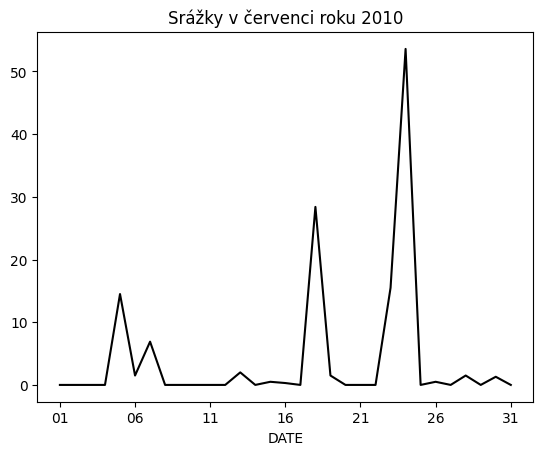

In [35]:
srazky_2010 = srazky.filter(like='2010')

# Filtr Series
srazky_2010_07 = srazky_2010.filter(like='-07-')

# Nahrazeni nadbytecnych hodnot z indexu Series
srazky_2010_07.index = srazky_2010_07.index.str.replace('2010-07-','')



# Definice grafu
srazky_2010_07.plot.line(title='Srážky v červenci roku 2010',color ='black')




## Cvičení

### Cvičení data

In [26]:
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df[df['NAME']=='RUZYNE']
# Vyber jednoho sloupce z dataframe do promenne srazky, ktera ma typ pandas.core.series.Series
dest = df['PRCP']
dest = dest.set_axis(df['DATE'])


### Cvičení zadání

V proměnné dest je uložena pd.Series

1. Za pomoci metody print vypište do konzole prvních 10 řádků Series
2. Do proměnné max_dest spočítejte maximální hodnotu z dest
3. Do proměnné dest_validni uložte Series dest zbavenou NaN hodnot
4. Do proměnné dest_doplneno uložte Series dest, kde NaN hodnoty jsou nahrazeny 0 (nulou)
5. Do proměnné dest_2010 uložte Series dest, ktera ma na indexu hodnotu obsahujici 2010

Bonus:

6. Zjistěte, kolik NaN hodnot je v proměnné dest_2010
7. Do proměnné dest_2010_prselo uložte booleanovský vektor kontrolující jestli hodnoty v Series dest_2010 jsou vyšší 0
8. Maximální hodnota pro měsíce 7 nebo 8 v roce 2010







In [34]:
print(dest.head(10))
max_dest = dest.max()
dest_validni = dest.dropna()
dest_doplneno = dest.fillna(0)
dest_2010 = dest.filter(like='2010')

dest_pocet = dest.count()
dest_shape = dest.shape
dest_nevyplneno_2010  = dest_2010[dest_2010.isna()]


dest_2010_prselo  = dest_2010>0

max_hodnota_2010=  dest_2010.filter(regex='-0[78]-').max()
max_hodnota_2010


DATE
2000-01-01    NaN
2000-01-02    NaN
2000-01-03    0.0
2000-01-04    NaN
2000-01-05    NaN
2000-01-06    NaN
2000-01-07    NaN
2000-01-08    0.0
2000-01-09    NaN
2000-01-10    1.0
Name: PRCP, dtype: float64


53.6